## 네이버 코칭스터디 4주차 : 분류 모델 만들기
임규연 (lky473736)

- tensorflow | keras를 이용하여 모델링, compile, fit, predict, summary, evaluation
- dogs vs. cats : https://www.kaggle.com/competitions/dogs-vs-cats/rules
- **강아지 사진과 고양이 사진을 학습**시켜서 분류모델을 만들 예정
- 1 : 강아지, 0 : 고양이

### 1) 데이터 로드 및 feature-engineering, train, test 데이터 분할

In [10]:
# 이미지 파일 갯수 새보기
# train데이터와 test데이터가 이미 분할되어있음

import os
import tensorflow as tf
import shutil

print ("train데이터 :", 25000)
print ("test데이터 :", len(os.listdir('../../data/dogs-vs-cats/test/test1/')))

train데이터 : 25000
test데이터 : 12500


In [6]:
# 강아지 폴더, 고양이 폴더, train 폴더로 세분화 후 각각 파일갯수 새보기

print ("강아지 train :", len(os.listdir('../..//data/dogs-vs-cats/dataset/dog/')))
print ("고양이 train :", len(os.listdir('../..//data/dogs-vs-cats/dataset/cat/')))

강아지 train : 12500
고양이 train : 12500


In [8]:
# 이미지 형식을 수치화 (keras.preprocessing 사용)

# train_ds : 이미지를 수치화
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../../data/dogs-vs-cats/dataset/',
    image_size = (64, 64),
    batch_size = 64, 
    subset = 'training',
    validation_split = 0.2,
    seed = 1234
)

# val_ds : validation 데이터셋
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '../../data/dogs-vs-cats/dataset/',
    image_size = (64, 64),
    batch_size = 64, 
    subset = 'validation',
    validation_split = 0.2,
    seed = 1234
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [9]:
# 0~255의 수치화를 0~1로 숫자 압축 (학습 속도 위해서)

def preprocessing_0to1(numeric_image, label) : 
    numeric_image = tf.cast(numeric_image/255.0, tf.float32) # 255로 나누어서 0~1 사이의 값으로
    return numeric_image, label
    
train_ds = train_ds.map(preprocessing_0to1)
val_ds = val_ds.map(preprocessing_0to1)

### 2~3) 모델링 및 모델 compile -> fit

In [11]:
# 모델링
# overfitting을 막기 위해 중간에 dropout

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D( (2, 2) ),
    tf.keras.layers.Dropout(0.2), # 중간에 노드 20% 떨구기
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D( (2, 2) ),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D( (2, 2) ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), # 개일 확률, 고양이일 확률
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        1

In [13]:
# compile -> fit

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit (train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
313/313 [==============================] - 46s 142ms/step - loss: 0.6211 - accuracy: 0.6400 - val_loss: 0.5311 - val_accuracy: 0.7382
Epoch 2/10
313/313 [==============================] - 48s 151ms/step - loss: 0.5205 - accuracy: 0.7411 - val_loss: 0.4932 - val_accuracy: 0.7632
Epoch 3/10
313/313 [==============================] - 47s 149ms/step - loss: 0.4697 - accuracy: 0.7752 - val_loss: 0.4542 - val_accuracy: 0.7894
Epoch 4/10
313/313 [==============================] - 46s 146ms/step - loss: 0.4316 - accuracy: 0.7989 - val_loss: 0.4123 - val_accuracy: 0.8120
Epoch 5/10
313/313 [==============================] - 46s 144ms/step - loss: 0.3936 - accuracy: 0.8202 - val_loss: 0.4230 - val_accuracy: 0.8080
Epoch 6/10
313/313 [==============================] - 48s 151ms/step - loss: 0.3669 - accuracy: 0.8350 - val_loss: 0.3793 - val_accuracy: 0.8228
Epoch 7/10
313/313 [==============================] - 58s 185ms/step - loss: 0.3347 - accuracy: 0.8525 - val_loss: 0.3637 - val_ac

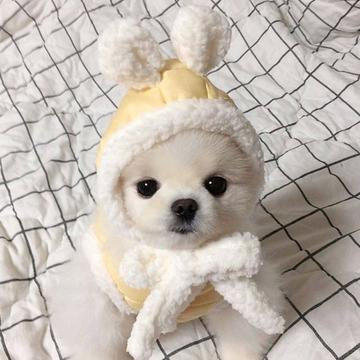  
이 강아지 사진을 이용하여 predict해보자.

In [29]:
# 위 강아지 사진 수치화

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/alphastation/repository/learning-AI101/topic3/miniproj/data',
    image_size = (64, 64)
)

Found 1 files belonging to 1 classes.


In [33]:
predictions = model.predict(test_ds)
print (abs(predictions))

# 1을 출력하는 것을 보니 분류를 잘 해줌

1/1 [==============================] - 0s 25ms/step
[[1.]]


### 4) evaluation

In [35]:
# 모델 평가하기

score = model.evaluate (val_ds)
print (score)

79/79 [==============================] - 4s 49ms/step - loss: 0.4036 - accuracy: 0.8340
[0.40360718965530396, 0.8339999914169312]
